<a href="https://colab.research.google.com/github/shobharanip/10-Deep-Learning-Methods-AI-Practitioners-_Shobha/blob/master/BDA_Final_project_UsedCar_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pyarrow import parquet as pq
import dask.dataframe as dd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Load the dataset
df = dd.read_csv('car_prices.csv')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mileage),color,interior,seller,mmr,sellingprice,saledate
npartitions=1,,,,,,,,,,,,,,,,
,int64,string,string,string,string,string,string,string,float64,int64,string,string,string,int64,int64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
! pip install 'fsspec>=0.3.3'

In [ ]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

In [ ]:
! pip install requests
! pip install aiohttp

In [ ]:
import numpy as np

In [ ]:
#import pandas as pd
#import dask.dataframe as dd

# Assuming 'df' is a Dask DataFrame

# Compute the entire DataFrame to convert it to a pandas DataFrame
# Note: Only do this if the DataFrame fits into memory
#pdf = df.compute()

# Now we can safely extract the column names, data types, and the first row
#column_names = pdf.columns
#data_types = pdf.dtypes.apply(str)  # Convert data types to string
#first_row = pdf.iloc[0]  # Get the first row

In [ ]:
# Cleaning the Dataset
# This might include dropping duplicates, handling missing values, etc.
df = df.drop_duplicates()
df = df.dropna() # Or other methods to handle missing values
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mileage),color,interior,seller,mmr,sellingprice,saledate
npartitions=1,,,,,,,,,,,,,,,,
,int64,string,string,string,string,string,string,string,float64,int64,string,string,string,int64,int64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
import dask.dataframe as dd

# Load CSV using Dask, specifying the dtype for "odometer (mileage)"
df = dd.read_csv('car_prices.csv', dtype={'odometer (mileage)': 'float64'})

# If using Parquet, ensure consistent string encoding (e.g., UTF-8) during data loading/saving
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mileage),color,interior,seller,mmr,sellingprice,saledate
npartitions=1,,,,,,,,,,,,,,,,
,int64,string,string,string,string,string,string,string,float64,float64,string,string,string,int64,int64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


1. Cleaning and Transforming DataFrames

In [ ]:
# Compute the dataframe
#Implicitly set the datatypes when reading the csv files# df = df.compute()

In [ ]:
#Check the shape of data
print("Shape of the dataset:", df.shape[0], "rows and", len(df.columns), "columns")

Shape of the dataset: 558837 rows and 16 columns


In [ ]:
# Assuming 'df' is your DataFrame after loading your dataset
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

year                      0
make                  10301
model                 10399
trim                  10651
body                  13195
transmission          65357
vin                       0
state                     0
condition             11794
odometer (mileage)       94
color                   749
interior                749
seller                    0
mmr                       0
sellingprice              0
saledate                  0
dtype: int64


In [ ]:
# Filter to only show columns with missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

make                  10301
model                 10399
trim                  10651
body                  13195
transmission          65357
condition             11794
odometer (mileage)       94
color                   749
interior                749
dtype: int64


In [ ]:
# For categorical columns
df['make'] = df['make'].fillna(df['make'].mode()[0])
missing_values_column_after = df['make'].isnull().sum()
print(f"Missing values in 'make' after filling: {missing_values_column_after}")


Missing values in 'make' after filling: 0


In [ ]:
df['transmission'] = df['transmission'].fillna('most_common_transmission')
missing_values_column_after = df['transmission'].isnull().sum()
print(f"Missing values in 'transmission' after filling: {missing_values_column_after}")


Missing values in 'transmission' after filling: 0


In [ ]:
df['odometer (mileage)'] = df['odometer (mileage)'].interpolate(method='linear')
missing_values_column_after = df['odometer (mileage)'].isnull().sum()
print(f"Missing values in 'odometer (mileage)' after filling: {missing_values_column_after}")

Missing values in 'odometer (mileage)' after filling: 0


In [ ]:
# This will create a new DataFrame without any columns that have missing values
df_no_missing_values = df.loc[:, df.isnull().sum() == 0]
# This will give you a list of columns that don't have any missing values
columns_without_missing_values = df.columns[df.isnull().sum() == 0]
print(columns_without_missing_values)


Index(['year', 'make', 'transmission', 'vin', 'state', 'odometer (mileage)',
       'seller', 'mmr', 'sellingprice', 'saledate'],
      dtype='object')


In [ ]:
# Filter to only show columns with missing values
# Check for missing values
missing_values1 = df.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
print(missing_values1)

model        10399
trim         10651
body         13195
condition    11794
color          749
interior       749
dtype: int64


In [ ]:
# Feature Engineering
# Before converting the 'saledate' column to datetime, let's remove the timezone information since it's not consistent (PST and PDT)
df['saledate'] = df['saledate'].str.replace(r" GMT-0800 \(PST\)", "", regex=True)
print(df['saledate'].head(5))

0    Tue Dec 16 2014 12:30:00
1    Tue Dec 16 2014 12:30:00
2    Thu Jan 15 2015 04:30:00
3    Thu Jan 29 2015 04:30:00
4    Thu Dec 18 2014 12:30:00
Name: saledate, dtype: string


In [ ]:
# Check the length of the DataFrame
print("Length of the DataFrame:", len(df))
# Assuming you have a Series or list you're trying to assign to 'saledate'
saledate_values = pd.to_datetime(df['saledate'], format='%a %b %d %Y %H:%M:%S', errors='coerce')
print(df['saledate'].head(5))

Length of the DataFrame: 558837
0    Tue Dec 16 2014 12:30:00
1    Tue Dec 16 2014 12:30:00
2    Thu Jan 15 2015 04:30:00
3    Thu Jan 29 2015 04:30:00
4    Thu Dec 18 2014 12:30:00
Name: saledate, dtype: string


In [ ]:
# Check the initial data type and the format of the first few entries
print("Data type before conversion:", df['saledate'].dtype)
print(df['saledate'].head())

# If the 'saledate' column is not of string type, convert it to string
if df['saledate'].dtype != 'object':  # 'object' typically means string in pandas DataFrame
    df['saledate'] = df['saledate'].astype(str)

# Apply regex replacement to remove the timezone information
df['saledate'] = df['saledate'].str.replace(r" GMT-[0-9]{4} \(.*\)", "", regex=True)
# Attempt to convert 'saledate' to datetime format without coercing errors
df['saledate'] = pd.to_datetime(df['saledate'], format='%a %b %d %Y %H:%M:%S', errors='raise')
# Now extract the year, month, and day of the week
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_day'] = df['saledate'].dt.dayofweek

# Print the first 5 entries after conversion
print(df['saledate'].head())

Data type before conversion: string
0    Tue Dec 16 2014 12:30:00
1    Tue Dec 16 2014 12:30:00
2    Thu Jan 15 2015 04:30:00
3    Thu Jan 29 2015 04:30:00
4    Thu Dec 18 2014 12:30:00
Name: saledate, dtype: string
0   2014-12-16 12:30:00
1   2014-12-16 12:30:00
2   2015-01-15 04:30:00
3   2015-01-29 04:30:00
4   2014-12-18 12:30:00
Name: saledate, dtype: datetime64[ns]


In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,year,condition,odometer (mileage),mmr,sellingprice,sale_year,sale_month,sale_day
0,2015,5.0,16639.0,20500,21500,2014,12,1
1,2015,5.0,9393.0,20800,21500,2014,12,1
2,2014,4.5,1331.0,31900,30000,2015,1,3
3,2015,4.1,14282.0,27500,27750,2015,1,3
4,2014,4.3,2641.0,66000,67000,2014,12,3
...,...,...,...,...,...,...,...,...
558832,2015,4.5,18255.0,35300,33000,2015,7,3
558833,2012,5.0,54393.0,30200,30800,2015,7,2
558834,2012,4.8,50561.0,29800,34000,2015,7,2
558835,2015,3.8,16658.0,15100,11100,2015,7,3


In [ ]:
# Compute correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,condition,odometer (mileage),mmr,sellingprice,sale_year,sale_month,sale_day
year,1.000000,0.551232,-0.772748,0.596601,0.586459,0.114314,-0.046689,0.045325
condition,0.551232,1.000000,-0.538842,0.485026,0.538774,0.035861,-0.014469,0.059668
odometer (mileage),-0.772748,-0.538842,1.000000,-0.588149,-0.582436,-0.086819,0.041047,-0.071553
mmr,0.596601,0.485026,-0.588149,1.000000,0.983632,0.073239,-0.024576,0.083330
sellingprice,0.586459,0.538774,-0.582436,0.983632,1.000000,0.076982,-0.029430,0.084354
sale_year,0.114314,0.035861,-0.086819,0.073239,0.076982,1.000000,-0.823229,0.031289
sale_month,-0.046689,-0.014469,0.041047,-0.024576,-0.029430,-0.823229,1.000000,-0.008213
sale_day,0.045325,0.059668,-0.071553,0.083330,0.084354,0.031289,-0.008213,1.000000


In [ ]:
# Identify 2-3 different correlations
correlations = correlation_matrix['sellingprice'].sort_values(ascending=False)
correlations

sellingprice          1.000000
mmr                   0.983632
year                  0.586459
condition             0.538774
sale_day              0.084354
sale_year             0.076982
sale_month           -0.029430
odometer (mileage)   -0.582436
Name: sellingprice, dtype: float64

In [ ]:
# Correlations
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Now compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation with 'sellingprice', sorted descending
print(correlation_matrix[['sellingprice']].sort_values(by='sellingprice', ascending=False))

                    sellingprice
sellingprice            1.000000
mmr                     0.983632
year                    0.586459
condition               0.538774
sale_day                0.084354
sale_year               0.076982
sale_month             -0.029430
odometer (mileage)     -0.582436


**Feature Engineering for Hypotheses**

In [ ]:
import pandas as pd
# Hypothesis 1: Fuel Efficiency vs. Price
# For Hypothesis 2: define a list of luxury brands for comparison.
# Assuming df is your DataFrame
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus']  # Add or remove brands as needed.
# Adjusting the lambda function to explicitly handle NA values
df['is_luxury'] = df['make'].apply(lambda x: 'Luxury' if not pd.isna(x) and x in luxury_brands else 'Non-Luxury')

In [ ]:
# For Hypothesis 3, derive car age from the model year
current_year = pd.Timestamp.now().year
df['car_age'] = current_year - df['year']

In [ ]:
print(df.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer (mileage)  ... interior  \
0  5xyktca69fg566472    ca        5.0             16639.0  ...    black   
1  5xyktca69fg561319    ca        5.0              9393.0  ...    beige   
2  wba3c1c51ek116351    ca        4.5              1331.0  ...    black   
3  yv1612tb4f1310987    ca        4.1             14282.0  ...    black   
4  wba6b2c57ed129731    ca        4.3              2641.0  ...    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500        

In [ ]:
print(df.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer (mileage)', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'sale_year', 'sale_month', 'sale_day',
       'is_luxury', 'car_age'],
      dtype='object')


**Visualization and Analysis**
Hypothesis 1: Fuel Efficiency vs. Price

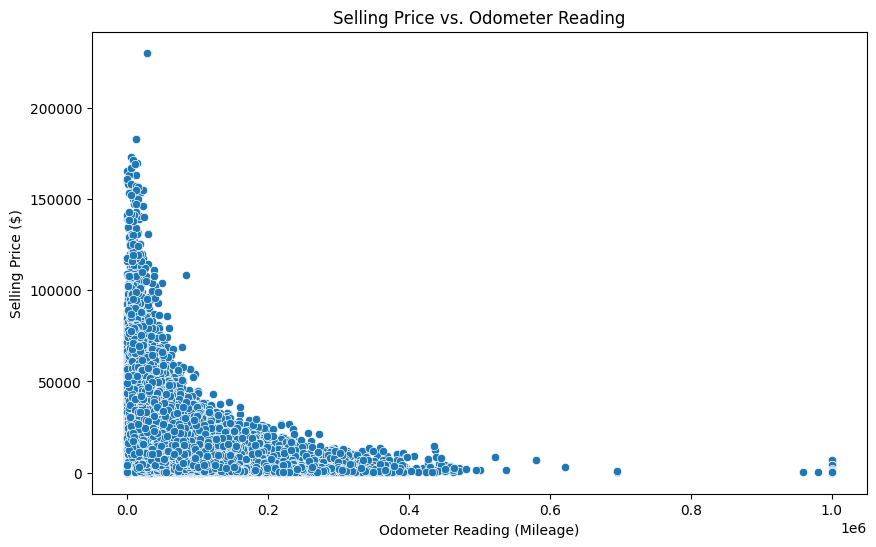

Correlation coefficient between odometer reading and selling price: -0.58243607658479


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between odometer reading and selling price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer (mileage)', y='sellingprice', data=df)
plt.title('Selling Price vs. Odometer Reading')
plt.xlabel('Odometer Reading (Mileage)')
plt.ylabel('Selling Price ($)')
plt.show()
# Calculating correlation coefficient
correlation_coefficient = df['odometer (mileage)'].corr(df['sellingprice'])
print(f"Correlation coefficient between odometer reading and selling price: {correlation_coefficient}")

**Hypothesis 2:** Luxury vs. Non-Luxury Brand Prices

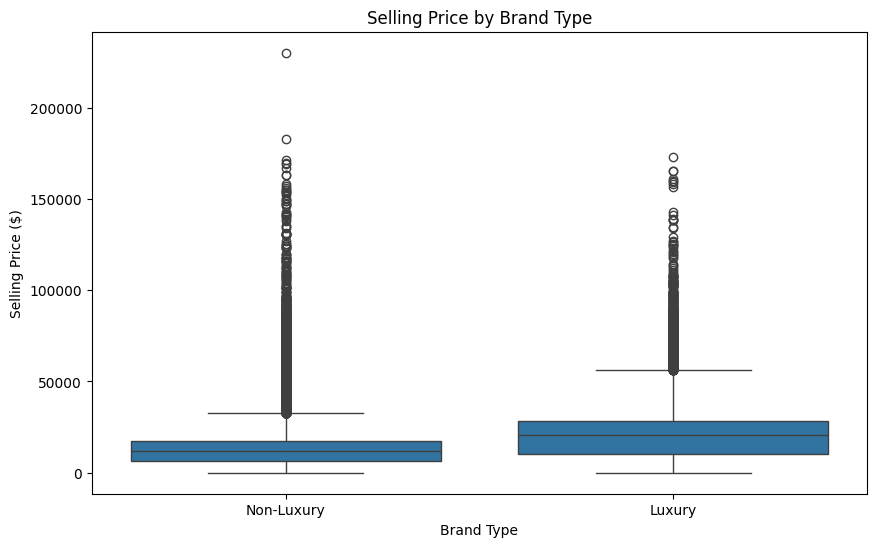

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing selling price by luxury status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_luxury', y='sellingprice', data=df)
plt.title('Selling Price by Brand Type')
plt.xlabel('Brand Type')
plt.ylabel('Selling Price ($)')
plt.show()


**Hypothesis 3:** Car Age vs. Price

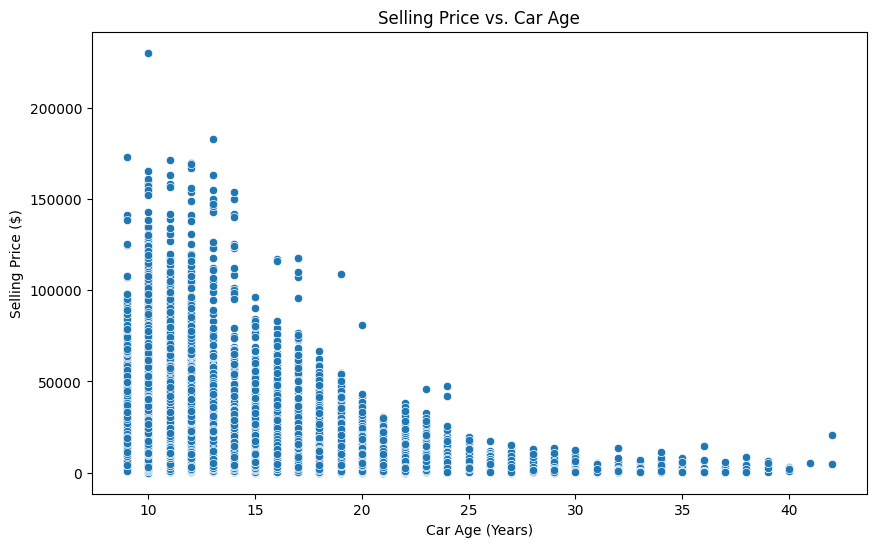

In [ ]:
# Assuming car_age has been calculated correctly as current year - year of the car
plt.figure(figsize=(10, 6))
sns.scatterplot(x='car_age', y='sellingprice', data=df)
plt.title('Selling Price vs. Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Selling Price ($)')
plt.show()


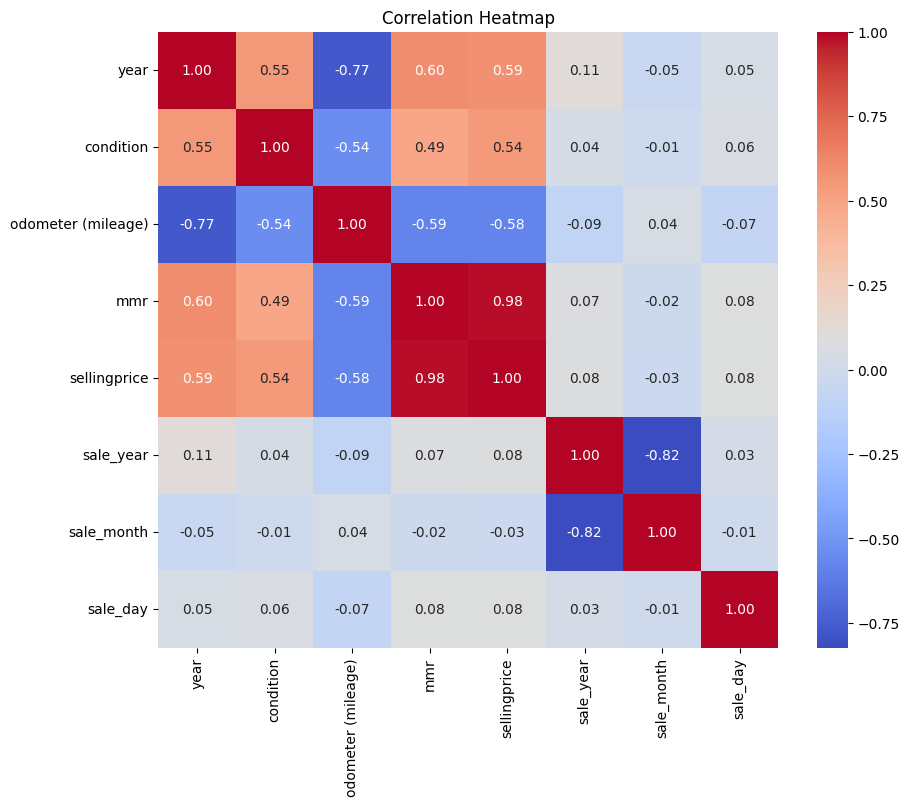

In [ ]:
# Visualization 1: Correlation Heatmap
#Visualizations (<=10)
# Here are some example visualizations. You would create more as needed for your analysis.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

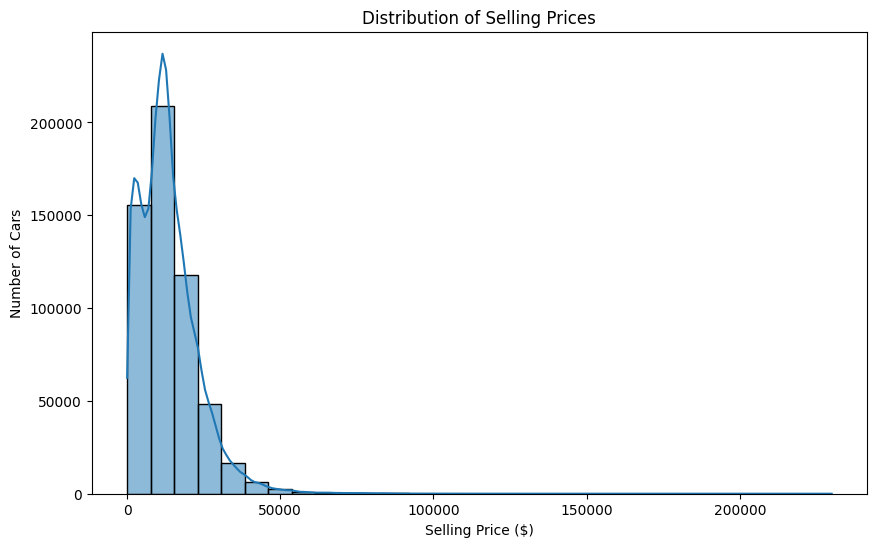

In [ ]:
# Visualization 2: Distribution vs Number of Cars
plt.figure(figsize=(10, 6))
sns.histplot(df['sellingprice'], bins=30, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price ($)')
plt.ylabel('Number of Cars')
plt.show()

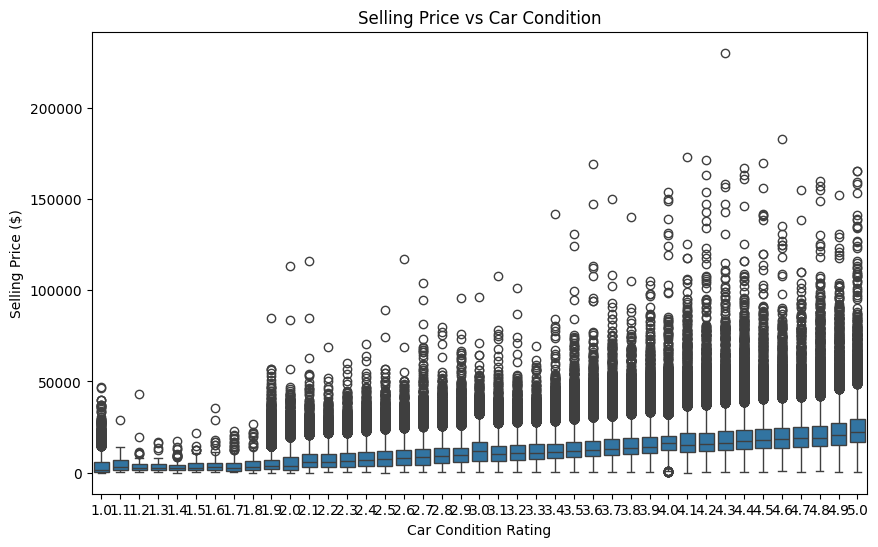

In [ ]:
# Visualization 3 : Price vs Condition
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['condition'], y=df['sellingprice'])
plt.title('Selling Price vs Car Condition')
plt.xlabel('Car Condition Rating')
plt.ylabel('Selling Price ($)')
plt.show()

In [ ]:
# Export Final Dataset as Parquet and CSV
df.to_csv('cleaned_data.csv', index=False)
df.to_parquet('cleaned_data.parquet')